# Description:
### It is essential for businesses to understand which features of the dataset has the highest impact on the desired outcome. Having the knowledge can help organizations in resouce allocation strategy effectively and efficiently to ensure the intervention to improve desired outcome. In this interesting project, the dataset used is about patients who did not show up to their appointments. Finding ways to encourage patients to show up to their appointment to get appropriate treatment is always a priority, especially in the ambulatory healthcare setting. Ultimately, this can benefit healthcare facilities to maximize their scheduling efforts and craft strategies to encourage patients to show up to appointments. 

# Project Objective:
### To find out 3 components have the most impact on the desired outcome. The features that can explain the most variance is identified so healthcare facilities can gain actionable insights and craft appropriate startegies and plans. 

# Process:
### This interesting project will start off with exploratory data analysis, data cleansing, feature-engineering, and preprocessing the data. Then, The Principle Component Analysis from sklearn library will be used and fit to the data. This model offers to explain, in a 2-D graphical form, the variance from the most significant 3 components in all features. Finally, the most relevant features from the vast dataset will be shown in the graphical form. 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("../input/noshowappointments/KaggleV2-May-2016.csv")

In [3]:
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Basic descriptive analysis

In [4]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
data["PatientId"].nunique()

62299

In [9]:
data["AppointmentID"].nunique()

110527

In [10]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
data["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

### Visualizing the gender data

<AxesSubplot:xlabel='No-show', ylabel='count'>

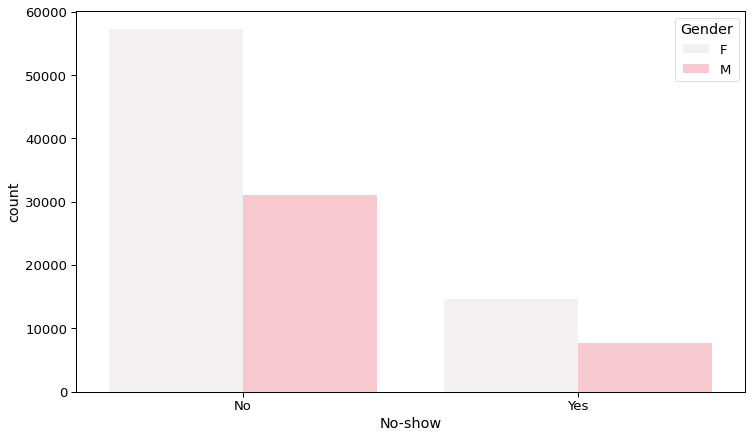

In [12]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x=data["No-show"], data=data, hue="Gender", color="pink") 

### Female patients, who made an appointment accounts for 65%. 
### Male patients, who made an appointment accounts for 35%. 

In [13]:
data["Gender"].value_counts(normalize=True)*100

F    64.997693
M    35.002307
Name: Gender, dtype: float64

### The probability of picking a male patient, who missed the appointment is 34.6%.
### The probability of picking a female patient, who missed the appointment is 65.4%.

In [14]:
data1 = data.groupby("No-show")["Gender"]
data1.value_counts(normalize=True)*100

No-show  Gender
No       F         64.898875
         M         35.101125
Yes      F         65.388234
         M         34.611766
Name: Gender, dtype: float64

In [15]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Noted that the feature "SheduledDay" is in onject type. Will need to create new features of scheduled year, month, and day to give us more meaningful information. They will be converted into datetime format.

In [16]:
data["ScheduledDay"].value_counts()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-17T13:52:29Z     1
2016-04-12T08:23:14Z     1
2016-05-03T11:25:43Z     1
2016-05-09T11:50:03Z     1
2016-05-24T07:28:28Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [17]:
data["ScheduledDay"] = pd.to_datetime(data["ScheduledDay"])

In [18]:
data["Scheduled_Yr"] = data["ScheduledDay"].dt.year

In [19]:
data["Scheduled_Yr"].value_counts()

2016    110465
2015        62
Name: Scheduled_Yr, dtype: int64

In [20]:
data["Scheduled_Mth"] = data["ScheduledDay"].dt.month

In [21]:
data["Scheduled_Mth"].value_counts()

5     67421
4     25339
6     13750
3      3614
2       281
12       61
1        60
11        1
Name: Scheduled_Mth, dtype: int64

In [22]:
data["Scheduled_Date"] = data["ScheduledDay"].dt.day

In [23]:
data["Scheduled_Date"].value_counts()

2     7160
3     6846
6     6415
20    5061
25    5055
18    4939
5     4902
19    4387
11    4382
16    4269
29    4144
12    4111
10    4100
9     4029
1     3916
13    3823
30    3719
4     3676
17    3627
24    3451
31    3149
28    2938
7     2507
26    2466
27    2331
8     2127
15    1550
14     847
23     233
22     226
21     141
Name: Scheduled_Date, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### Since the feature "ScheduledDay" has been engineered into 3 new features in datetime format, it is no longer needed. 

In [25]:
data = data.drop("ScheduledDay", axis=1)

### Visualizing the "ScheduledDate" feature. Noted that appointments were made across except 21st to 23rd. 

<AxesSubplot:xlabel='Scheduled_Date', ylabel='count'>

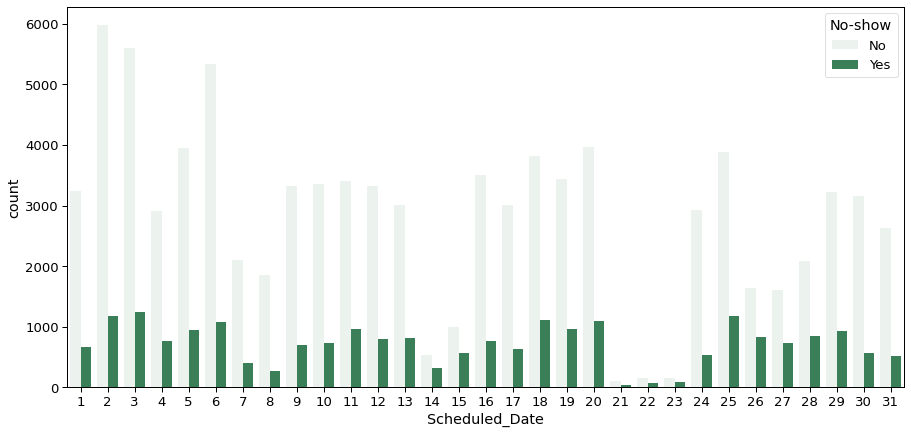

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Scheduled_Date"], hue="No-show", data=data, color="seagreen")

### Visualizing the Scheduled Month. Noted that only March to June have the most appointments made throughout the year. 

<AxesSubplot:xlabel='Scheduled_Mth', ylabel='count'>

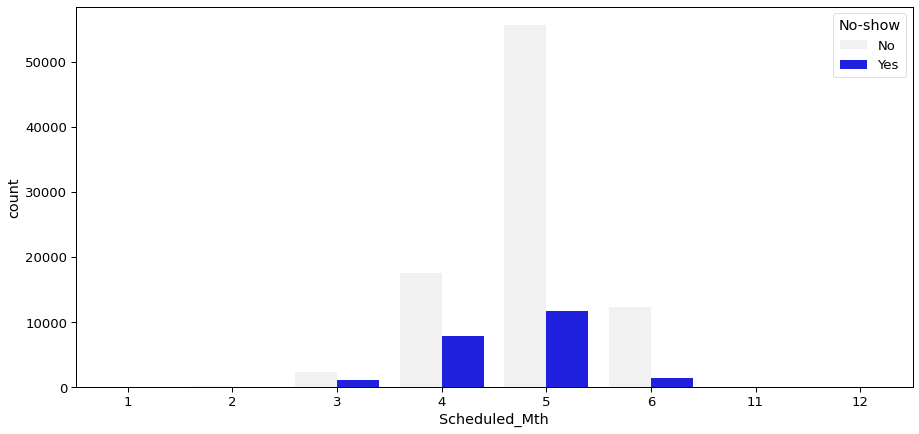

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Scheduled_Mth"], hue="No-show", data=data, color="blue")

In [28]:
data["Scheduled_Mth"].value_counts(normalize=True)*100

5     60.999575
4     22.925620
6     12.440399
3      3.269789
2      0.254237
12     0.055190
1      0.054285
11     0.000905
Name: Scheduled_Mth, dtype: float64

###  Will replace: 
###  Month of April, May, June as 1; the rest as 0. 
###  This feature will provide us more meaningful information when feeding the data into PCA.

In [29]:
data["Scheduled_Mth"] = data["Scheduled_Mth"].replace([4,5,6], 100)
data["Scheduled_Mth"] = data["Scheduled_Mth"].replace([1,2,3,7,8,9,10,11,12], 0)

In [30]:
data["Scheduled_Mth"] = data["Scheduled_Mth"].replace(100, 1)

In [31]:
data["Scheduled_Mth"].value_counts()

1    106510
0      4017
Name: Scheduled_Mth, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
 13  Scheduled_Yr    110527 non-null  int64  
 14  Scheduled_Mth   110527 non-null  int64  
 15  Scheduled_Date  110527 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 13.5+ 

### Moving on to the next feature, Appointment Day. Noted that this feature is in object datatype as well. Will need convert them into datetime format. 

In [33]:
data["AppointmentDay"].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [34]:
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])

In [35]:
data["Appointment_Yr"] = data["AppointmentDay"].dt.year

In [36]:
data["Appointment_Mth"] = data["AppointmentDay"].dt.month

In [37]:
data["Appointment_Date"] = data["AppointmentDay"].dt.day

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientId         110527 non-null  float64            
 1   AppointmentID     110527 non-null  int64              
 2   Gender            110527 non-null  object             
 3   AppointmentDay    110527 non-null  datetime64[ns, UTC]
 4   Age               110527 non-null  int64              
 5   Neighbourhood     110527 non-null  object             
 6   Scholarship       110527 non-null  int64              
 7   Hipertension      110527 non-null  int64              
 8   Diabetes          110527 non-null  int64              
 9   Alcoholism        110527 non-null  int64              
 10  Handcap           110527 non-null  int64              
 11  SMS_received      110527 non-null  int64              
 12  No-show           110527 non-null  object   

### Similarly to ScheduledDay feature, this feature is no longer needed since feature engineering has been done. 

In [39]:
data = data.drop("AppointmentDay", axis=1)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110527 non-null  float64
 1   AppointmentID     110527 non-null  int64  
 2   Gender            110527 non-null  object 
 3   Age               110527 non-null  int64  
 4   Neighbourhood     110527 non-null  object 
 5   Scholarship       110527 non-null  int64  
 6   Hipertension      110527 non-null  int64  
 7   Diabetes          110527 non-null  int64  
 8   Alcoholism        110527 non-null  int64  
 9   Handcap           110527 non-null  int64  
 10  SMS_received      110527 non-null  int64  
 11  No-show           110527 non-null  object 
 12  Scheduled_Yr      110527 non-null  int64  
 13  Scheduled_Mth     110527 non-null  int64  
 14  Scheduled_Date    110527 non-null  int64  
 15  Appointment_Yr    110527 non-null  int64  
 16  Appointment_Mth   11

# Fun Fact:
###   The probability of picking a male patient, who made an appointment is 35%.
###   The probability of picking a female patient, who made an appointment is 65%.

In [41]:
data["Gender"].value_counts(normalize=True)*100

F    64.997693
M    35.002307
Name: Gender, dtype: float64

# Fun Fact:
###   The probability of picking a male patient, who missed the appointment is 34.6%
###   The probability of picking a female patient, who missed the appointment is 65.4%.

In [42]:
gb_gender = data.groupby("No-show")["Gender"]
gb_gender.value_counts(normalize=True)*100

No-show  Gender
No       F         64.898875
         M         35.101125
Yes      F         65.388234
         M         34.611766
Name: Gender, dtype: float64

###    Noted that gender gives us almost the same proportion in data length, missed appointment, and made to the appointment. It does not look like it is a meaningful feature. Will drop this feature. 

In [43]:
data = data.drop("Gender", axis=1)

### Moving to the next feature: Neighbourhood

In [44]:
data["Neighbourhood"].value_counts(normalize=True)*100

JARDIM CAMBURI                 6.982004
MARIA ORTIZ                    5.252110
RESISTÊNCIA                    4.008975
JARDIM DA PENHA                3.507740
ITARARÉ                        3.179314
                                 ...   
ILHA DO BOI                    0.031666
ILHA DO FRADE                  0.009048
AEROPORTO                      0.007238
ILHAS OCEÂNICAS DE TRINDADE    0.001810
PARQUE INDUSTRIAL              0.000905
Name: Neighbourhood, Length: 81, dtype: float64

###  The "Neighbourhood" feature's length is 81 and the value of each in percentage, as shown above, does not really give any meaningful information. Will just drop this feature. 

In [45]:
data = data.drop("Neighbourhood", axis=1)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110527 non-null  float64
 1   AppointmentID     110527 non-null  int64  
 2   Age               110527 non-null  int64  
 3   Scholarship       110527 non-null  int64  
 4   Hipertension      110527 non-null  int64  
 5   Diabetes          110527 non-null  int64  
 6   Alcoholism        110527 non-null  int64  
 7   Handcap           110527 non-null  int64  
 8   SMS_received      110527 non-null  int64  
 9   No-show           110527 non-null  object 
 10  Scheduled_Yr      110527 non-null  int64  
 11  Scheduled_Mth     110527 non-null  int64  
 12  Scheduled_Date    110527 non-null  int64  
 13  Appointment_Yr    110527 non-null  int64  
 14  Appointment_Mth   110527 non-null  int64  
 15  Appointment_Date  110527 non-null  int64  
dtypes: float64(1), int64

### Next is our target feature or y-variable: No-show. Yes is number of people who did not show up to the appointment. 

In [47]:
data["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

### About 20% of the patients did not show up to the appointments. This is significant, considering the healthcare professionals, who anticipated the patient, and became idled for the next 30 minutes or 1 hour. Overall, a healthcare worker will be idling (not doing anything) 20% of the time, which is not productive from the finance perspective. 

In [48]:
data["No-show"].value_counts(normalize=True)*100

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

<AxesSubplot:xlabel='No-show', ylabel='count'>

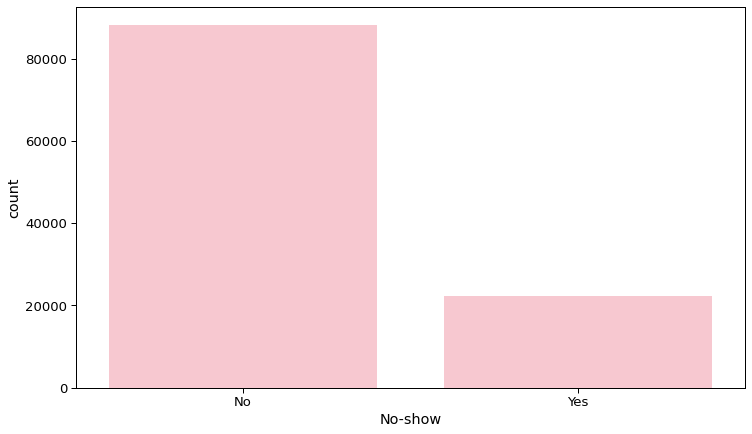

In [49]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x=data["No-show"], color="pink")

### The target-feature will be mapped as a binary classification: Yes as 1, No as 0. 

In [50]:
data["No-show"] = data["No-show"].map({"Yes": 1, "No": 0})

In [51]:
data["No-show"].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110527 non-null  float64
 1   AppointmentID     110527 non-null  int64  
 2   Age               110527 non-null  int64  
 3   Scholarship       110527 non-null  int64  
 4   Hipertension      110527 non-null  int64  
 5   Diabetes          110527 non-null  int64  
 6   Alcoholism        110527 non-null  int64  
 7   Handcap           110527 non-null  int64  
 8   SMS_received      110527 non-null  int64  
 9   No-show           110527 non-null  int64  
 10  Scheduled_Yr      110527 non-null  int64  
 11  Scheduled_Mth     110527 non-null  int64  
 12  Scheduled_Date    110527 non-null  int64  
 13  Appointment_Yr    110527 non-null  int64  
 14  Appointment_Mth   110527 non-null  int64  
 15  Appointment_Date  110527 non-null  int64  
dtypes: float64(1), int64

### The AppointmentID is a unique identifier for each appointment made, which does not provide meaningful information in this project. Will drop. 

In [53]:
data = data.drop("AppointmentID", axis=1)

In [54]:
data["Scholarship"].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [55]:
data["Age"].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

### The "Age" feature as -1 is illogical. Will just drop this observation, instead of replacing it with a speculated value(mean/mode). 

In [56]:
data["Age"].min()

-1

In [57]:
data = data.drop(data[data["Age"] < 0].index)

In [58]:
data["Age"].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

### Visualizing the no-show population in appointment scheduled date. Noted that the majority of patients, who did not show up is from age 0 to 60s and evenly spread across all days in a month. There is not much pattern recognized here but an assumption is that on a given day, there will be 20% of patients would not show up to the appointment. 

<AxesSubplot:xlabel='Scheduled_Date', ylabel='Age'>

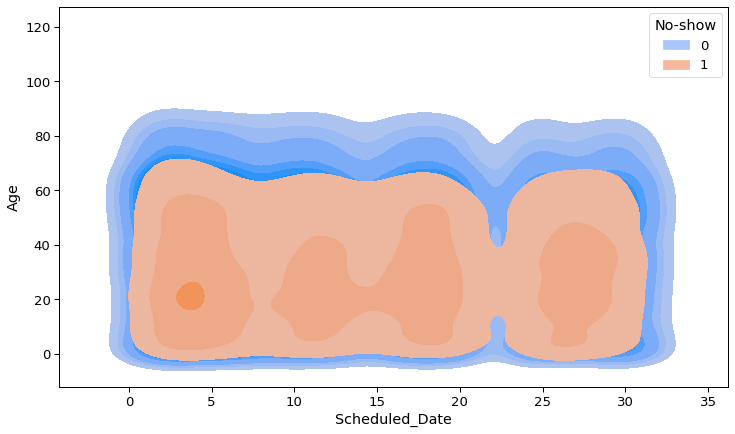

In [59]:
plt.figure(figsize=(12,7))
sns.kdeplot(x="Scheduled_Date", y=data["Age"], data=data, hue="No-show", palette="coolwarm", fill=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110526 non-null  float64
 1   Age               110526 non-null  int64  
 2   Scholarship       110526 non-null  int64  
 3   Hipertension      110526 non-null  int64  
 4   Diabetes          110526 non-null  int64  
 5   Alcoholism        110526 non-null  int64  
 6   Handcap           110526 non-null  int64  
 7   SMS_received      110526 non-null  int64  
 8   No-show           110526 non-null  int64  
 9   Scheduled_Yr      110526 non-null  int64  
 10  Scheduled_Mth     110526 non-null  int64  
 11  Scheduled_Date    110526 non-null  int64  
 12  Appointment_Yr    110526 non-null  int64  
 13  Appointment_Mth   110526 non-null  int64  
 14  Appointment_Date  110526 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 13.5 MB


### Continue on with the rest of the features, which are in binary classification so not much cleansing to do. 

In [61]:
data["Hipertension"].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

In [62]:
data["Diabetes"].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [63]:
data["Alcoholism"].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [64]:
data["Handcap"].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [65]:
data["SMS_received"].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

### Noted that almost 32% of the patients received SMS text (assuming it is a reminder for an appointment). The question is why not all patients receive the same feature? Considering self-opt-out VS patients do not own mobile phones. This is pretty common in under-served population area. This feature can be potentially impactful in the desired outcome and is worthy of further exploration by healthcare administrators.  

In [66]:
data["SMS_received"].value_counts(normalize=True)

0    0.678971
1    0.321029
Name: SMS_received, dtype: float64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PatientId         110526 non-null  float64
 1   Age               110526 non-null  int64  
 2   Scholarship       110526 non-null  int64  
 3   Hipertension      110526 non-null  int64  
 4   Diabetes          110526 non-null  int64  
 5   Alcoholism        110526 non-null  int64  
 6   Handcap           110526 non-null  int64  
 7   SMS_received      110526 non-null  int64  
 8   No-show           110526 non-null  int64  
 9   Scheduled_Yr      110526 non-null  int64  
 10  Scheduled_Mth     110526 non-null  int64  
 11  Scheduled_Date    110526 non-null  int64  
 12  Appointment_Yr    110526 non-null  int64  
 13  Appointment_Mth   110526 non-null  int64  
 14  Appointment_Date  110526 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 13.5 MB


### The feature "PatientId" is a unique identifier, which is not a meaningful data. Will just drop this feature. 

In [68]:
data = data.drop("PatientId", axis=1)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Age               110526 non-null  int64
 1   Scholarship       110526 non-null  int64
 2   Hipertension      110526 non-null  int64
 3   Diabetes          110526 non-null  int64
 4   Alcoholism        110526 non-null  int64
 5   Handcap           110526 non-null  int64
 6   SMS_received      110526 non-null  int64
 7   No-show           110526 non-null  int64
 8   Scheduled_Yr      110526 non-null  int64
 9   Scheduled_Mth     110526 non-null  int64
 10  Scheduled_Date    110526 non-null  int64
 11  Appointment_Yr    110526 non-null  int64
 12  Appointment_Mth   110526 non-null  int64
 13  Appointment_Date  110526 non-null  int64
dtypes: int64(14)
memory usage: 12.6 MB


In [70]:
data.head(3)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Yr,Scheduled_Mth,Scheduled_Date,Appointment_Yr,Appointment_Mth,Appointment_Date
0,62,0,1,0,0,0,0,0,2016,1,29,2016,4,29
1,56,0,0,0,0,0,0,0,2016,1,29,2016,4,29
2,62,0,0,0,0,0,0,0,2016,1,29,2016,4,29


### Preparing data for PCA using standard scaler from the sklearn library

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaled_data = scaler.fit_transform(data)

### After transformation using the scaler

In [74]:
scaled_data

array([[ 1.07792585, -0.33011372,  2.01736646, ...,  0.        ,
        -2.55404542,  1.82196369],
       [ 0.81829709, -0.33011372, -0.49569576, ...,  0.        ,
        -2.55404542,  1.82196369],
       [ 1.07792585, -0.33011372, -0.49569576, ...,  0.        ,
        -2.55404542,  1.82196369],
       ...,
       [-0.69620397, -0.33011372, -0.49569576, ...,  0.        ,
         1.66737395, -0.60724131],
       [ 0.03941083, -0.33011372, -0.49569576, ...,  0.        ,
         1.66737395, -0.60724131],
       [ 0.73175418, -0.33011372, -0.49569576, ...,  0.        ,
         1.66737395, -0.60724131]])

### Importing Principle Component Analysis from the sklearn library

In [75]:
from sklearn.decomposition import PCA

### Number of components to be set at 3

In [76]:
pca = PCA(n_components=3)

### Finally, the scaled data is fit to the PCA

In [77]:
pca.fit(scaled_data)

PCA(n_components=3)

In [78]:
x_pca = pca.transform(scaled_data)

In [79]:
scaled_data.shape

(110526, 14)

### Noted that the scaled data has been changed from 14 features to 3 main components in PCA

In [80]:
x_pca.shape

(110526, 3)

Text(0, 0.5, 'Second Principal Component')

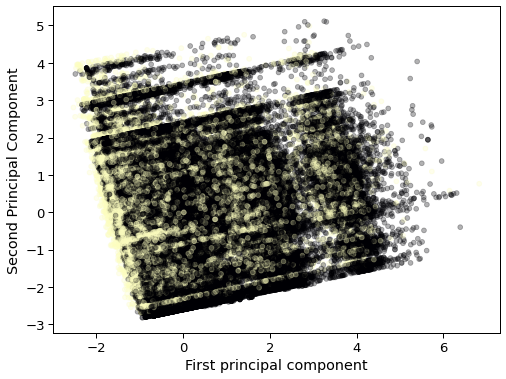

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['No-show'],cmap='magma', alpha=0.3)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Third Principal Component')

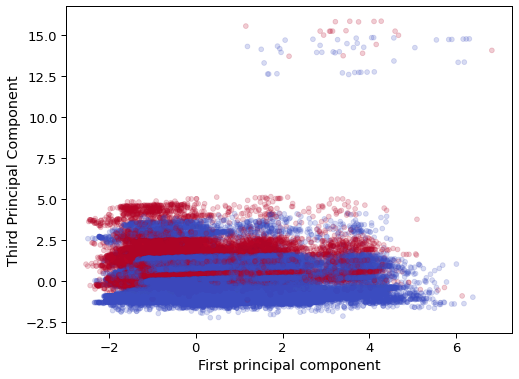

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2],c=data['No-show'],cmap='coolwarm', alpha=0.2)
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Third Principal Component')

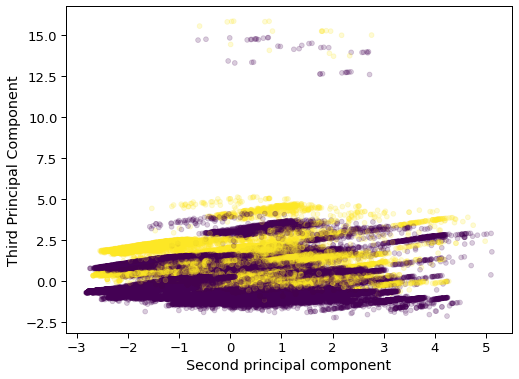

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,2],c=data['No-show'],cmap='viridis', alpha=0.2)
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')

### The following is the output of PCA in raw form, which is difficult to interpret (at least for me) without some sort of graphical forms. 

In [84]:
pca.components_

array([[ 0.54833719, -0.08537467,  0.5909125 ,  0.49162257,  0.12882353,
         0.13798416, -0.02346842, -0.08797591, -0.04574504,  0.01455385,
        -0.11681294, -0.        ,  0.13809665, -0.1490675 ],
       [ 0.13253333, -0.01800299,  0.14840282,  0.12179078,  0.02334441,
         0.03458751,  0.0089606 ,  0.03801732, -0.01705388, -0.15135042,
         0.45444654,  0.        , -0.57525194,  0.61753811],
       [ 0.04589548, -0.02386918,  0.02001152,  0.00254275, -0.08018408,
        -0.04964998,  0.65515983,  0.41120364, -0.26455543, -0.46570004,
         0.21454039, -0.        ,  0.17861876, -0.15780103]])

### Setting up to visualize the result using heatmap

In [85]:
data.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'No-show', 'Scheduled_Yr', 'Scheduled_Mth',
       'Scheduled_Date', 'Appointment_Yr', 'Appointment_Mth',
       'Appointment_Date'],
      dtype='object')

In [86]:
features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism','Handcap', 
                    'SMS_received', 'No-show', 'Scheduled_Yr', 'Scheduled_Mth','Scheduled_Date', 
                    'Appointment_Yr', 'Appointment_Mth','Appointment_Date']

In [87]:
data_comp = pd.DataFrame(pca.components_, columns=features)

### Finally, the "Appointment Date" and "Scheduled Date" are shown to be the features that explain the most of the variance for the target feature. This is followed by Age, hypertension, and diabetes. The feature that has the least is Appointment Month, which is shown in blue.

<AxesSubplot:>

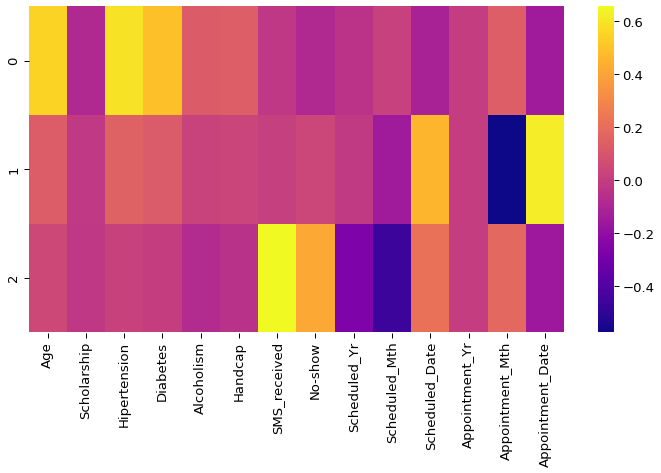

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(data_comp,cmap='plasma',)

### Overall, SMS text was expected to the one of the key components for the target feature, but the heatmap does not show that is the case. The data used is only for 2016 so it would be beneficial if this was done using a few years period to give us a better understanding of the components. 

In [89]:
###